   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
RBF Kernel Model Accuracy: 1.0000


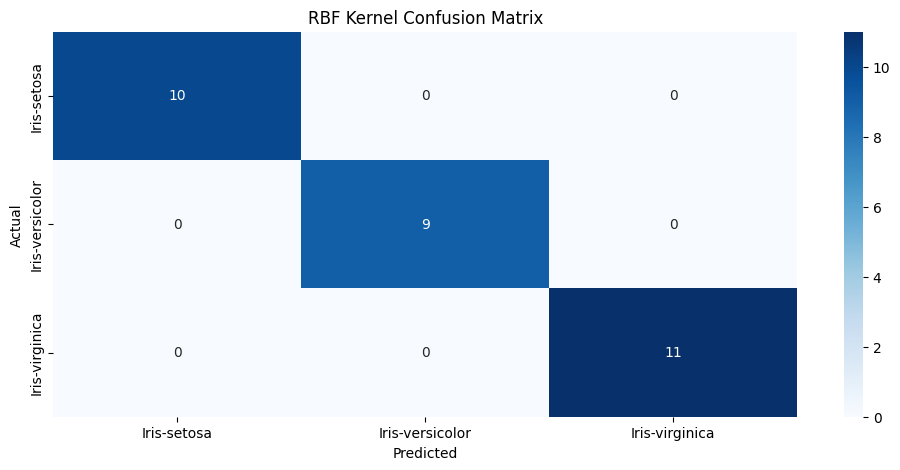

Linear Kernel Model Accuracy: 1.0000


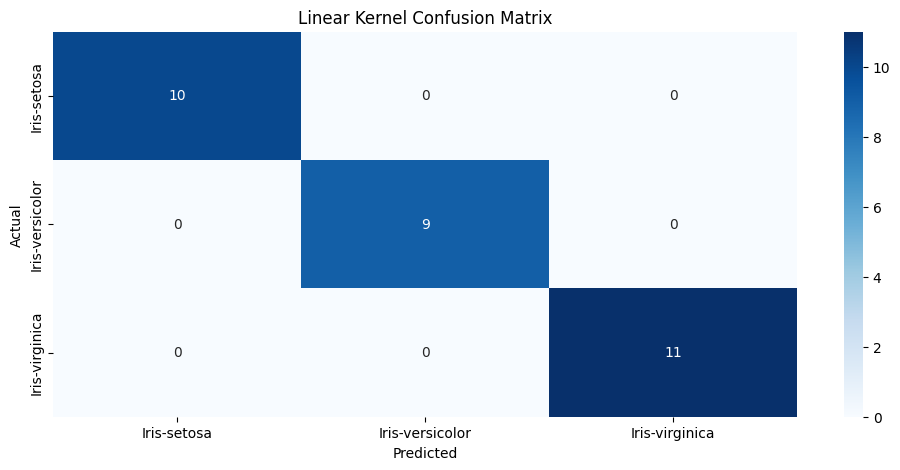

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the CSV file
# Replace 'your_file.csv' with the path to your CSV file.
df = pd.read_csv('/iris (2).csv')

# Step 2: Inspect the first few rows to understand the structure
print(df.head())

# Step 3: Assuming the target column is named 'target' (change this to your actual target column name)
# Separate the features and the target
X = df.drop('species', axis=1)  # Drop the target column from features
y = df['species']  # Target column

# Step 4: Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the SVM model using RBF kernel
rbf_model = SVC(kernel='rbf')
rbf_model.fit(X_train, y_train)

# Step 6: Evaluate the RBF model on the test set
rbf_accuracy = rbf_model.score(X_test, y_test)
print(f'RBF Kernel Model Accuracy: {rbf_accuracy:.4f}')

rbf_predictions = rbf_model.predict(X_test)
rbf_cm = confusion_matrix(y_test, rbf_predictions)
plt.figure(figsize=(12, 5))
sns.heatmap(rbf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['species'].unique(), yticklabels=df['species'].unique())
plt.title('RBF Kernel Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 7: Train the SVM model using Linear kernel
linear_model = SVC(kernel='linear')
linear_model.fit(X_train, y_train)

# Step 8: Evaluate the Linear kernel model on the test set
linear_accuracy = linear_model.score(X_test, y_test)
print(f'Linear Kernel Model Accuracy: {linear_accuracy:.4f}')

linear_predictions = linear_model.predict(X_test)
linear_cm = confusion_matrix(y_test, linear_predictions)
plt.figure(figsize=(12, 5))
sns.heatmap(linear_cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['species'].unique(), yticklabels=df['species'].unique())
plt.title('Linear Kernel Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




Linear Kernel Model Accuracy: 0.8545


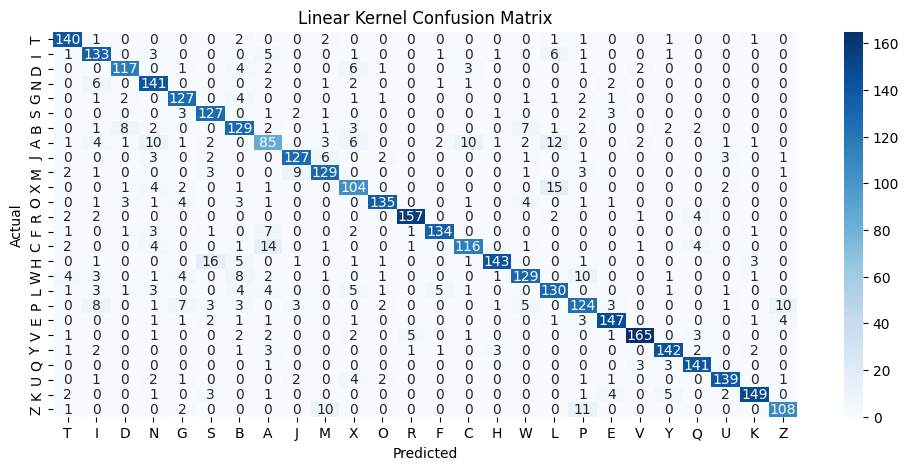

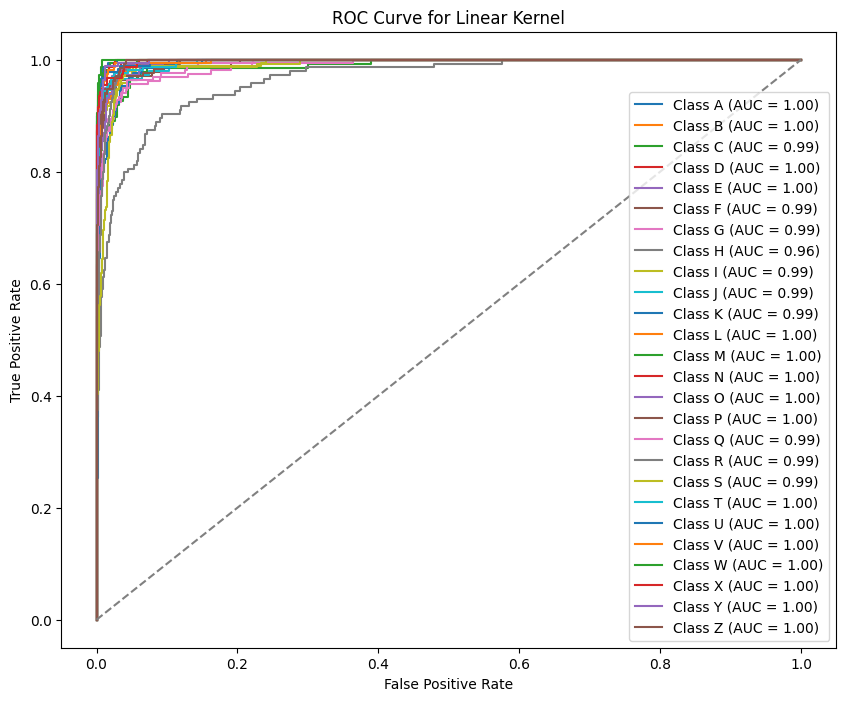

Precision: 0.8567
Recall: 0.8545
F1 Score: 0.8546


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Step 1: Load the CSV file
df = pd.read_csv('/letter-recognition.csv')

# Step 2: Separate the features and the target
X = df.drop('letter', axis=1)  # Drop the target column from features
y = df['letter']  # Target column

# Step 3: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the SVM model using Linear kernel (with probability=True to get probabilities for ROC)
linear_model = SVC(kernel='linear', probability=True)
linear_model.fit(X_train, y_train)

# Step 5: Evaluate the Linear kernel model on the test set
linear_accuracy = linear_model.score(X_test, y_test)
print(f'Linear Kernel Model Accuracy: {linear_accuracy:.4f}')

linear_predictions = linear_model.predict(X_test)

# Step 6: Compute confusion matrix for Linear kernel
linear_cm = confusion_matrix(y_test, linear_predictions)
plt.figure(figsize=(12, 5))
sns.heatmap(linear_cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['letter'].unique(), yticklabels=df['letter'].unique())
plt.title('Linear Kernel Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 7: Binarize the true labels (convert to binary for each class)
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# Step 8: Get predicted probabilities for Linear kernel model
y_pred_prob_linear = linear_model.predict_proba(X_test)

# Step 9: Compute ROC curve and AUC for each class (Linear Kernel)
fpr_linear, tpr_linear, roc_auc_linear = {}, {}, {}
for i in range(len(lb.classes_)):
    fpr_linear[i], tpr_linear[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_linear[:, i])
    roc_auc_linear[i] = auc(fpr_linear[i], tpr_linear[i])

# Step 10: Plot ROC curve for each class (Linear Kernel)
plt.figure(figsize=(10, 8))
for i in range(len(lb.classes_)):
    plt.plot(fpr_linear[i], tpr_linear[i], label=f'Class {lb.classes_[i]} (AUC = {roc_auc_linear[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve for Linear Kernel')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Step 11: Calculate Precision, Recall, F1 Score for the linear kernel
precision = precision_score(y_test, linear_predictions, average='weighted')
recall = recall_score(y_test, linear_predictions, average='weighted')
f1 = f1_score(y_test, linear_predictions, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Step 12: Specificity for each class (True Negative Rate)
specificities = []
for i in range(linear_cm.shape[0]):
    tn = linear_cm.sum() - linear_cm[i, :].sum() - linear_cm[:, i].sum() + linear_cm[i, i]
    fp = linear_cm[:, i].sum() - linear_cm[i, i]
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    specificities.append(specificity)

# Print specificity for each class
for i, class_label in enumerate(lb.classes_):
    print

